In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_classes = len(iris.feature_names)
plot_colors = "bry"
plot_step = 0.02

def draw(clf):
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):

        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Train
        clf = clf.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, n_classes, cmap=plt.cm.Paired)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        plt.axis("tight")

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.Paired)

        plt.legend()
        plt.show()

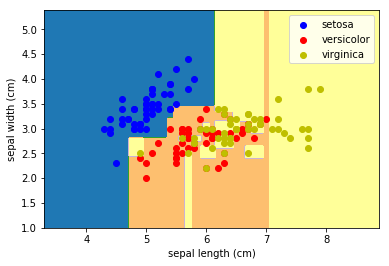

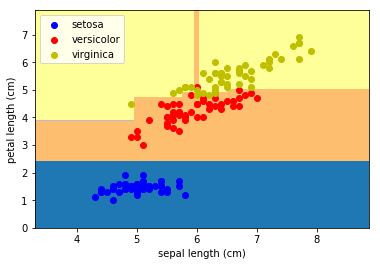

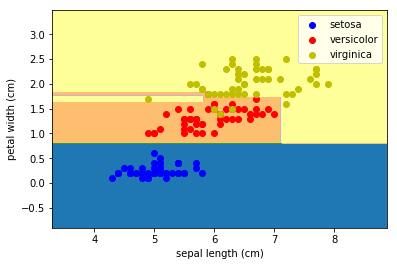

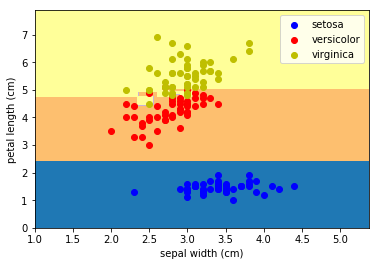

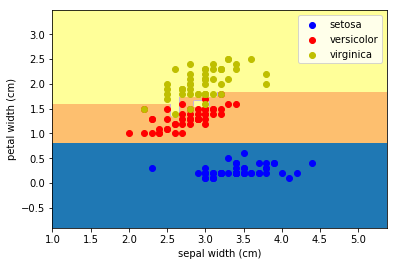

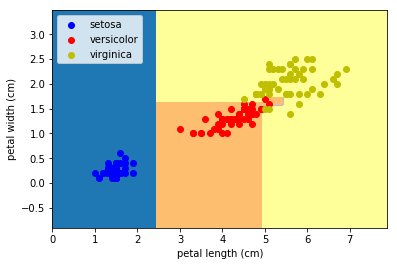

In [3]:
from sklearn.tree import DecisionTreeClassifier 
draw(DecisionTreeClassifier())

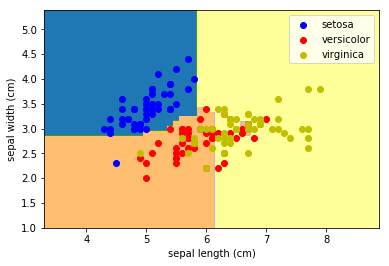

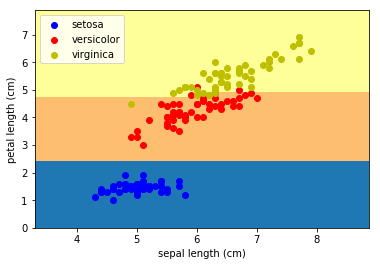

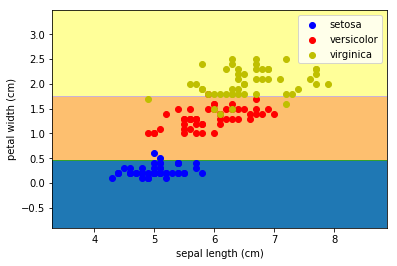

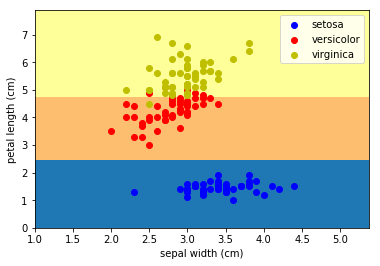

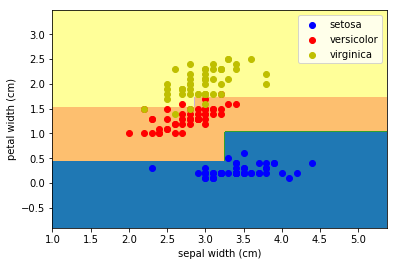

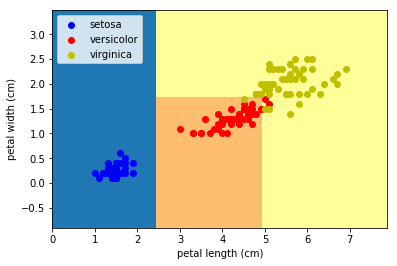

In [4]:
import lightgbm as lgb
draw(lgb.LGBMClassifier(n_estimators=50, silent=True))

/home/ad/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


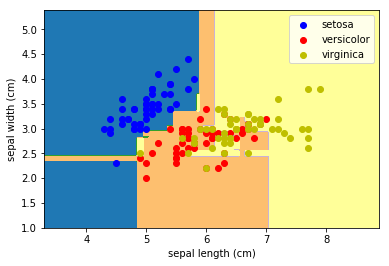

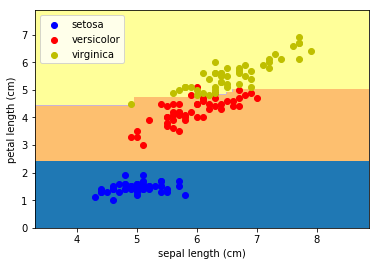

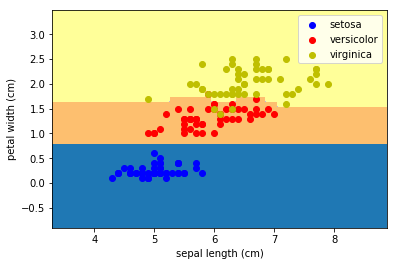

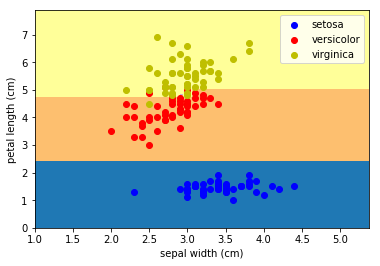

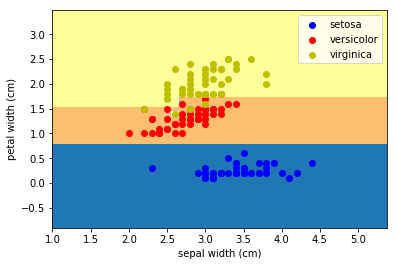

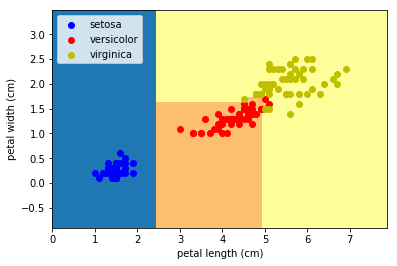

In [5]:
from xgboost import XGBClassifier
draw(XGBClassifier())